<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/Homework/Homework_4__pawpularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 - Pawpularity

It's time to train your first model on ~cats~ real data. The dataset of cute pets is avaialble here -  [Pawpularity Contest - Predict the popularity of shelter pet photos](https://www.kaggle.com/c/petfinder-pawpularity-score/data)


Your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

In this homework we'll only use tabular meta data. Our goal is to fit linear reggresion on binary features. Let's see if we can do it better than predicting a constant.
![PetFinder.my - Pawpularity Contest](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
data = pd.read_csv("/content/drive/MyDrive/MLb4/Homework/Homework_4__pawpularity/train.csv") # you can downloand only train.csv from https://www.kaggle.com/c/petfinder-pawpularity-score/data

In [12]:
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Let's create train/test split. We keep 20% of data for testing model performance

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.Pawpularity)
train.shape, test.shape

((7929, 14), (1983, 14))

In [6]:
# Check that you have the same train/test split as othersф
assert(train.iloc[5].Pawpularity == 13)
assert(train.iloc[-5].Face == 1)
assert(test.iloc[5].Group == 1)
assert(test.iloc[-5].Pawpularity == 39)

### Baseline

In [7]:
from sklearn.metrics import mean_squared_error

Create a copy for test dataset:

In [8]:
test = test.copy()

Set baseline based on mean/median/mode:

In [13]:
features = data.columns[1:-1]
features

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [16]:
data[features].head(3)

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0,1,1,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,1,1,0,0


In [23]:
test['baseline'] = 0 # try to use mean/median/mode as baseline

In [24]:
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

43.28163641116915

In [27]:
test['mean'] = test[features].mean(axis = 1)
mean_squared_error(test.Pawpularity, test['mean'], squared=False)

43.039497368737614

In [29]:
test['median'] = test[features].median(axis = 1)
mean_squared_error(test.Pawpularity, test['median'], squared=False)

43.26942123391883

In [32]:
test['mode'] = test[features].mode(axis = 1).iloc[0].values[0]
mean_squared_error(test.Pawpularity, test['mode'], squared=False)

43.28163641116915

In [33]:
test

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,mean,median,mode
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0,0.250000,0.0,0.0
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0.166667,0.0,0.0
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0,0.416667,0.0,0.0
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0,0.333333,0.0,0.0
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0,0.250000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,205be2d8e887f2fabe6ef8cd7ae122d1,0,1,1,1,0,0,0,0,0,0,0,0,39,0,0.250000,0.0,0.0
9608,f8001843e7514bbc112f668eb6dd22b5,0,1,1,1,0,0,0,0,0,1,0,0,33,0,0.333333,0.0,0.0
7250,ba8194b599940def5a8a36fa5c576565,0,1,1,1,0,0,1,0,0,0,0,0,41,0,0.333333,0.0,0.0
3025,4e3c8816d95b083b870c6747a26fcb58,0,0,0,1,0,0,0,0,1,1,0,1,2,0,0.333333,0.0,0.0


### Regression

Let's try to train linear regression on binary features

In [ ]:
features = data.columns[1:-1]
features

In [38]:
X_train = train[features]
y_train = train['Pawpularity']
X_test = test[features]

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### Linear Regression

In [39]:
model = LinearRegression() # Compare several regression models, select the best. Don't forget to tune hyper params
model.fit(X_train, y_train)
test['pred'] = model.predict(X_test)

test['pred']

6600    37.957221
3336    37.940408
4785    37.928493
2128    38.177026
4162    37.957221
          ...    
1243    37.957221
9608    37.708688
7250    39.062426
3025    33.787974
1290    37.928493
Name: pred, Length: 1983, dtype: float64

In [ ]:
# Train your model here:
# model.fit()
# test['pred'] = model.predict()

Calculate score:

In [40]:
mean_squared_error(test.Pawpularity, test.pred, squared=False)

20.613211282893758

Check params:

In [41]:
list(zip(features, model.coef_)) # model's weights

[('Subject Focus', -1.3184191941230021),
 ('Eyes', -1.9247962162298835),
 ('Face', 2.107441598807191),
 ('Near', 0.01681275070249094),
 ('Action', -0.9241970093571129),
 ('Accessory', 1.2659010714807621),
 ('Group', 1.105205350876402),
 ('Collage', 0.655550804416301),
 ('Human', 0.21980501892115073),
 ('Occlusion', -0.2485332017579941),
 ('Info', -1.453131808612999),
 ('Blur', -3.9578732160824996)]

In [42]:
model.intercept_ # model's bias

37.75776263342286

Analyze errors:

In [ ]:
## True value / pred value plot:
#sns.scatterplot(x=test.pred, y=test.Pawpularity)

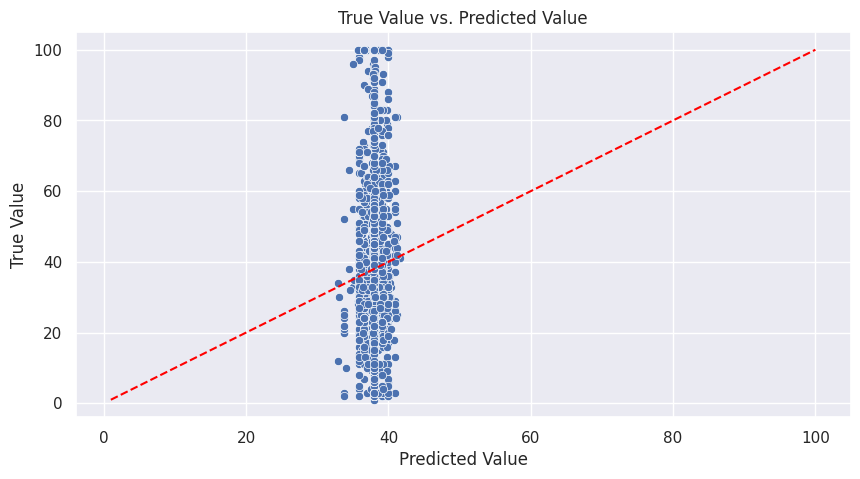

In [48]:
# Plot scatter plot
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
        [test['Pawpularity'].min(), test['Pawpularity'].max()],
        color='red', linestyle='--')
plt.show()


In [ ]:
## Errors distribution:
#sns.histplot(test.Pawpularity - test.pred)

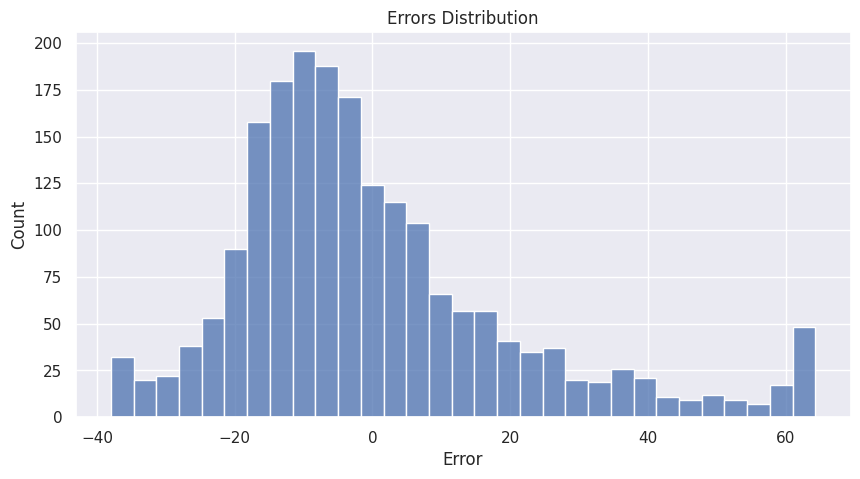

In [49]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Ridge regression L2

In [50]:
import time
from IPython import display

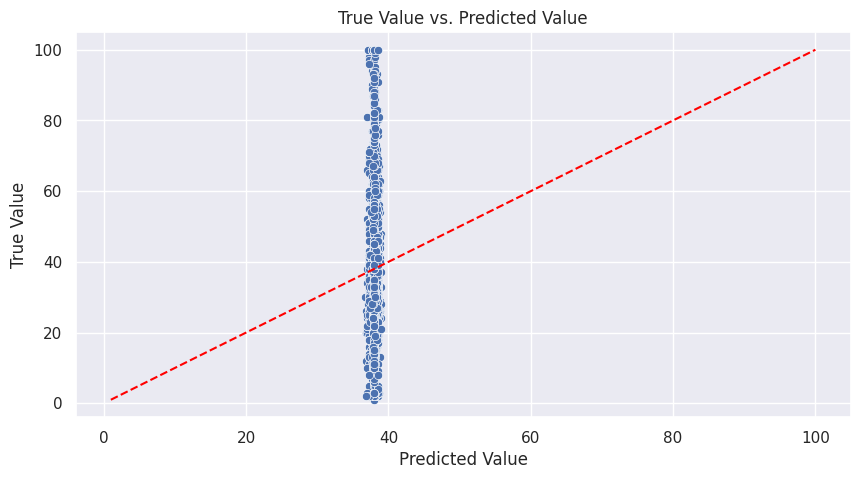

best_score: 20.612638666228705, best_ridge_alpha: 45.1


In [57]:
# init values
ridge_alphas = np.arange(0.1,1000,45)
best_score = 100
best_ridge_alpha = 0


for current_ridge_alpha in ridge_alphas:
  ridgeReg = Ridge(alpha=current_ridge_alpha)
  ridgeReg.fit(X_train, y_train)

  test['pred'] = ridgeReg.predict(X_test)
  current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

  # Plot scatter plot
  display.clear_output(wait=True)
  # Set plot title and axis labels
  plt.title('True Value vs. Predicted Value')
  plt.xlabel('Predicted Value')
  plt.ylabel('True Value')
  sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
  # Add diagonal line
  plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
         [test['Pawpularity'].min(), test['Pawpularity'].max()],
         color='red', linestyle='--')
  plt.show()
  #time.sleep(0.5)

  print("best_score: " + str(best_score) + ", best_ridge_alpha: " + str(best_ridge_alpha) + ", current score: " + str(current_score) + ", current_ridge_alpha: " + str(current_ridge_alpha))
  if current_score < best_score:
    best_score = current_score
    best_ridge_alpha = current_ridge_alpha



#Run the for the best found score
ridgeReg = Ridge(alpha=best_ridge_alpha)
ridgeReg.fit(X_train, y_train)

# Plot scatter plot
display.clear_output(wait=True)
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
        [test['Pawpularity'].min(), test['Pawpularity'].max()],
        color='red', linestyle='--')
plt.show()
print("best_score: " + str(best_score) + ", best_ridge_alpha: " + str(best_ridge_alpha))

In [58]:
list(zip(features, ridgeReg.coef_)) # model's weights

[('Subject Focus', -1.0857476652434757),
 ('Eyes', -1.5258860993505912),
 ('Face', 1.702513187879459),
 ('Near', -0.013395439184291105),
 ('Action', -0.5649984466486424),
 ('Accessory', 1.1496571931512403),
 ('Group', 1.0430486796683625),
 ('Collage', 0.4999866715485533),
 ('Human', 0.20218995359251263),
 ('Occlusion', -0.236839431845869),
 ('Info', -1.2484418162819273),
 ('Blur', -3.366610918065325)]

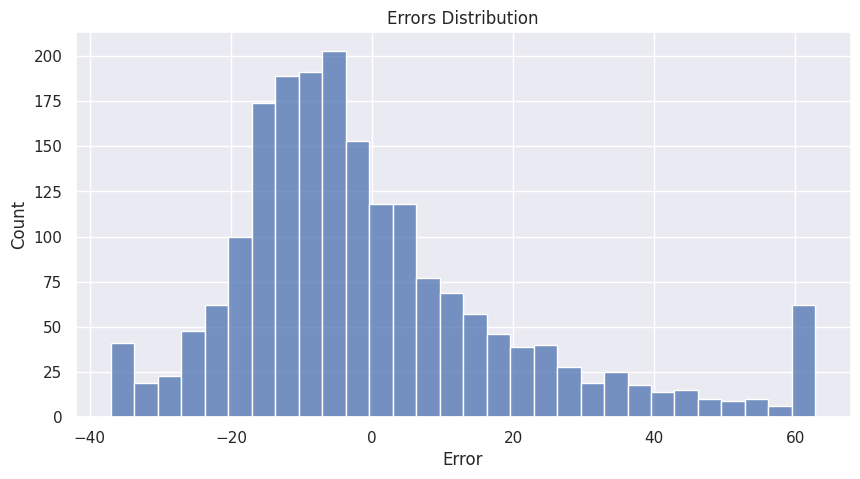

In [59]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Lasso L1

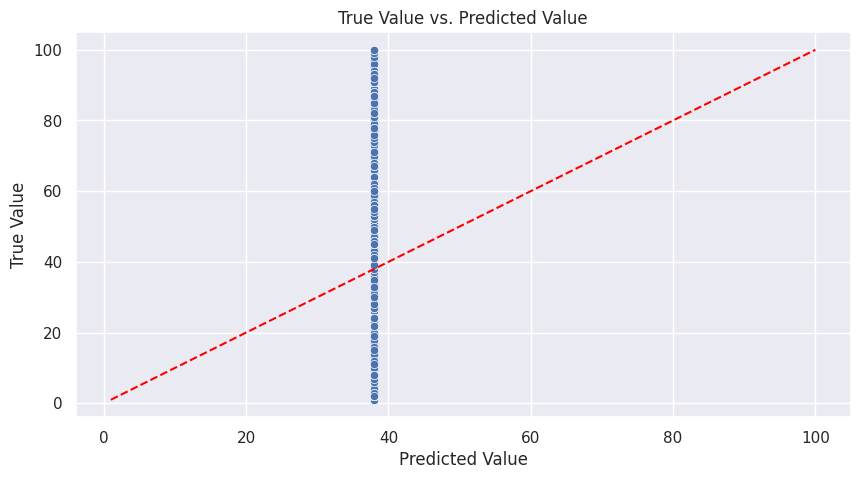

best_score: 20.617506165697478, best_lasso_alpha: 45.1


In [62]:
# init values
lasso_alphas = np.arange(0.1,1000,45)
best_score = 100
best_lasso_alpha = 0


for current_lasso_alpha in lasso_alphas:
  modelLasso = Lasso(alpha=current_lasso_alpha)
  modelLasso.fit(X_train, y_train)

  test['pred'] = modelLasso.predict(X_test)
  current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

  # Plot scatter plot
  display.clear_output(wait=True)
  # Set plot title and axis labels
  plt.title('True Value vs. Predicted Value')
  plt.xlabel('Predicted Value')
  plt.ylabel('True Value')
  sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
  # Add diagonal line
  plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
         [test['Pawpularity'].min(), test['Pawpularity'].max()],
         color='red', linestyle='--')
  plt.show()
  #time.sleep(0.5)

  print("best_score: " + str(best_score) + ", best_lasso_alpha: " + str(best_lasso_alpha) + ", current score: " + str(current_score) + ", current_lasso_alpha: " + str(current_lasso_alpha))
  if current_score < best_score:
    best_score = current_score
    best_lasso_alpha = current_lasso_alpha



#Run the for the best found score
modelLasso = Lasso(alpha=best_lasso_alpha)
modelLasso.fit(X_train, y_train)

# Plot scatter plot
display.clear_output(wait=True)
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
        [test['Pawpularity'].min(), test['Pawpularity'].max()],
        color='red', linestyle='--')
plt.show()
print("best_score: " + str(best_score) + ", best_lasso_alpha: " + str(best_lasso_alpha))

In [63]:
list(zip(features, modelLasso.coef_)) # model's weights

[('Subject Focus', -0.0),
 ('Eyes', 0.0),
 ('Face', 0.0),
 ('Near', -0.0),
 ('Action', -0.0),
 ('Accessory', 0.0),
 ('Group', 0.0),
 ('Collage', 0.0),
 ('Human', -0.0),
 ('Occlusion', -0.0),
 ('Info', -0.0),
 ('Blur', -0.0)]

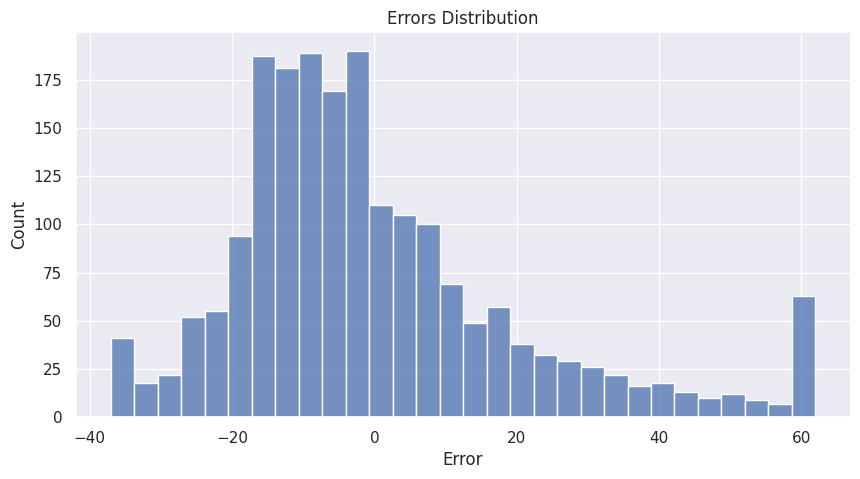

In [64]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

### Best score
**Compare several regression models (L1, L2 regularization), select the best. Don't forget to tune hyperparams**

Print your best score and what type of regression you used to achieve it:

In [65]:
print("Best score was with Ridge: 20.612638666228705, best_ridge_alpha: 45.1")

Best score was with Ridge: 20.612638666228705, best_ridge_alpha: 45.1


### Polinomial Regression
Do polynomial features improve the score?

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) helps to combine several steps into one model

#### Polinomial Regression with Ridge


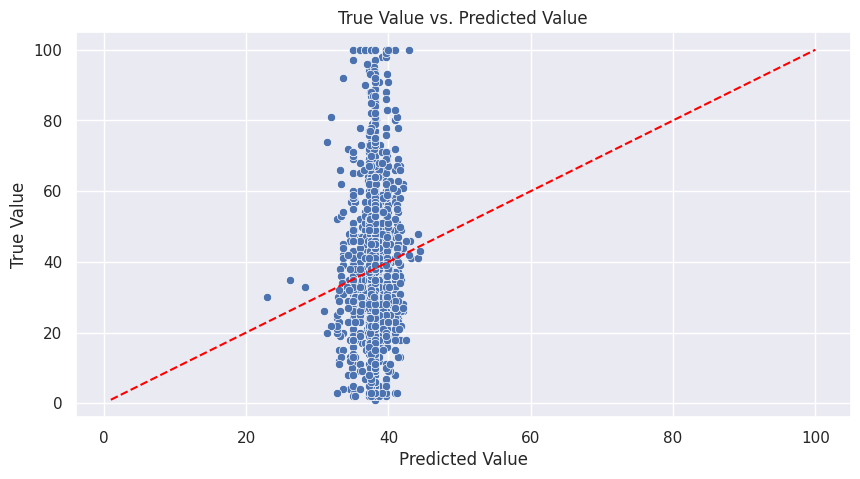

best_score: 20.612641342069338, best_ridge_alpha: 50.1, best_degree: 1, current score: 20.567960973457875, current_ridge_alpha: 25.1, current_degree: 2


In [ ]:
# init values
polynom_degrees = np.arange(1,5,1)
ridge_alphas = np.arange(0.1,300,25)

best_degree = 0
best_ridge_alpha = 0

best_score = 100

for current_degree in polynom_degrees:
  for current_ridge_alpha in ridge_alphas:
    modelPolynom = make_pipeline(
      PolynomialFeatures(degree=current_degree),
      Ridge(alpha=current_ridge_alpha)
    )

    modelPolynom.fit(X_train, y_train)

    test['pred'] = modelPolynom.predict(X_test)
    current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

    # Plot scatter plot
    display.clear_output(wait=True)
    # Set plot title and axis labels
    plt.title('True Value vs. Predicted Value')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
    # Add diagonal line
    plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
          [test['Pawpularity'].min(), test['Pawpularity'].max()],
          color='red', linestyle='--')
    plt.show()
    #time.sleep(2)

    print("best_score: " + str(best_score) + ", best_ridge_alpha: " + str(best_ridge_alpha) +", best_degree: " + str(best_degree) + ", current score: " + str(current_score) + ", current_ridge_alpha: " + str(current_ridge_alpha)+", current_degree: " + str(current_degree))
    if current_score < best_score:
      best_score = current_score
      best_degree = current_degree
      best_ridge_alpha = current_ridge_alpha



#Run the for the best found score
modelPolynom = make_pipeline(
  PolynomialFeatures(degree=best_degree),
  Ridge(alpha=best_ridge_alpha)
)

modelPolynom.fit(X_train, y_train)

test['pred'] = modelPolynom.predict(X_test)

# Plot scatter plot
display.clear_output(wait=True)
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
        [test['Pawpularity'].min(), test['Pawpularity'].max()],
        color='red', linestyle='--')
plt.show()
print("best_score: " + str(best_score) + ", best_ridge_alpha: " + str(best_ridge_alpha) +", best_degree: " + str(best_degree))

In [82]:
print("best_score: 20.567959011832407, best_ridge_alpha: 25.519999999999996, best_degree: 2")

best_score: 20.567959011832407, best_ridge_alpha: 25.519999999999996, best_degree: 2


In [ ]:
# Hint: to check wieght use:
# list(zip(t.get_feature_names(input_features=features), model.steps[1][1].coef_)) # model's weights

In [ ]:
list(zip(features, modelPolynom.steps[1][1].coef_)) # model's weights

In [ ]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Polinomial Regression with Lasso


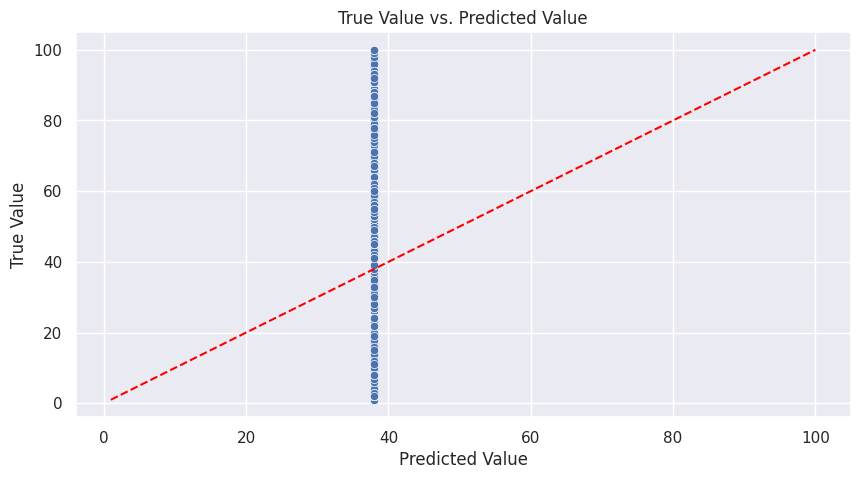

Polynom+Lasso best_score: 20.617506165697478, best_alpha: 25.1, best_degree: 1


In [85]:
# init values
polynom_degrees = np.arange(1,5,1)
alphas = np.arange(0.1,500,25)

best_degree = 0
best_alpha = 0

best_score = 100

for current_degree in polynom_degrees:
  for current_alpha in alphas:
    modelPolynom = make_pipeline(
      PolynomialFeatures(degree=current_degree),
      Lasso(alpha=current_alpha)
    )

    modelPolynom.fit(X_train, y_train)

    test['pred'] = modelPolynom.predict(X_test)
    current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

    # Plot scatter plot
    display.clear_output(wait=True)
    # Set plot title and axis labels
    plt.title('True Value vs. Predicted Value')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
    # Add diagonal line
    plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
          [test['Pawpularity'].min(), test['Pawpularity'].max()],
          color='red', linestyle='--')
    plt.show()
    #time.sleep(2)

    print("best_score: " + str(best_score) + ", best_alpha: " + str(best_alpha) +", best_degree: " + str(best_degree) + ", current score: " + str(current_score) + ", current_alpha: " + str(current_alpha)+", current_degree: " + str(current_degree))
    if current_score < best_score:
      best_score = current_score
      best_degree = current_degree
      best_alpha = current_alpha



#Run the for the best found score
modelPolynom = make_pipeline(
  PolynomialFeatures(degree=current_degree),
  Lasso(alpha=current_alpha)
)

modelPolynom.fit(X_train, y_train)

test['pred'] = modelPolynom.predict(X_test)
current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

# Plot scatter plot
display.clear_output(wait=True)
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
      [test['Pawpularity'].min(), test['Pawpularity'].max()],
      color='red', linestyle='--')
plt.show()
print("Polynom+Lasso best_score: " + str(best_score) + ", best_alpha: " + str(best_alpha) +", best_degree: " + str(best_degree))

In [86]:
print("Polynom+Lasso best_score: 20.617506165697478, best_alpha: 25.1, best_degree: 1")

Polynom+Lasso best_score: 20.617506165697478, best_alpha: 25.1, best_degree: 1


In [87]:
list(zip(features, modelPolynom.steps[1][1].coef_)) # model's weights

[('Subject Focus', 0.0),
 ('Eyes', -0.0),
 ('Face', 0.0),
 ('Near', 0.0),
 ('Action', -0.0),
 ('Accessory', -0.0),
 ('Group', 0.0),
 ('Collage', 0.0),
 ('Human', 0.0),
 ('Occlusion', -0.0),
 ('Info', -0.0),
 ('Blur', -0.0)]

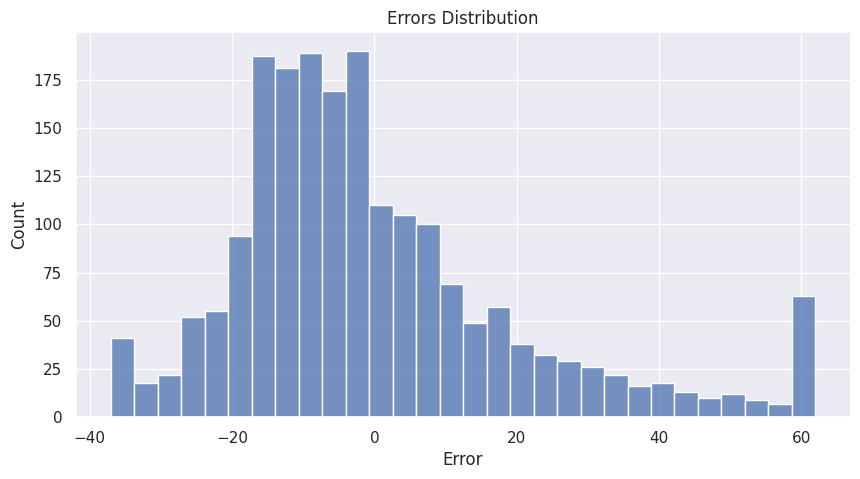

In [88]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Polinomial Regression with Logistic


In [ ]:
# init values
polynom_degrees = np.arange(1,5,1)

best_degree = 0
best_alpha = 0

best_score = 100

for current_degree in polynom_degrees:
  modelPolynom = make_pipeline(
    PolynomialFeatures(degree=current_degree),
    LinearRegression()
  )

  modelPolynom.fit(X_train, y_train)

  test['pred'] = modelPolynom.predict(X_test)
  current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

  # Plot scatter plot
  display.clear_output(wait=True)
  # Set plot title and axis labels
  plt.title('True Value vs. Predicted Value')
  plt.xlabel('Predicted Value')
  plt.ylabel('True Value')
  sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
  # Add diagonal line
  plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
        [test['Pawpularity'].min(), test['Pawpularity'].max()],
        color='red', linestyle='--')
  plt.show()
  #time.sleep(2)

  print("best_score: " + str(best_score) + ", best_degree: " + str(best_degree) + ", current score: " + str(current_score) + ", current_degree: " + str(current_degree))
  if current_score < best_score:
    best_score = current_score
    best_degree = current_degree
    best_alpha = current_alpha



#Run the for the best found score
modelPolynom = make_pipeline(
  PolynomialFeatures(degree=current_degree),
  Lasso(alpha=current_alpha)
)

modelPolynom.fit(X_train, y_train)

test['pred'] = modelPolynom.predict(X_test)
current_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)

# Plot scatter plot
display.clear_output(wait=True)
# Set plot title and axis labels
plt.title('True Value vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.scatterplot(x=test['pred'], y=test['Pawpularity'])
# Add diagonal line
plt.plot([test['Pawpularity'].min(), test['Pawpularity'].max()],
      [test['Pawpularity'].min(), test['Pawpularity'].max()],
      color='red', linestyle='--')
plt.show()
print("Polynom+Linear best_score: " + str(best_score) + ", best_degree: " + str(best_degree))

In [ ]:
list(zip(features, modelPolynom.steps[1][1].coef_)) # model's weights

In [ ]:
# Calculate the errors
errors = test['Pawpularity'] - test['pred']

# Plot the histogram of errors
sns.histplot(errors)

# Set plot title and axis labels
plt.title('Errors Distribution')
plt.xlabel('Error')
plt.ylabel('Count')

# Display the plot
plt.show()

Print your best score with pollinomial reggresion:

### Feature selection

Let's use Lasso for feature selection. Sklearn's [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) will help

In [ ]:
from sklearn.feature_selection import SelectFromModel ##

In [ ]:
model = make_pipeline(
    ...
)

Print your best score with feature selection: